In [1]:
import pandas as pd
train = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/train.csv")
test = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/test.csv")
mis_map = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/misconception_mapping.csv")
sub = pd.read_csv("/kaggle/input/eedi-mining-misconceptions-in-mathematics/sample_submission.csv")

In [2]:
misTable = {}
for i in range(mis_map.shape[0]):
    misTable[mis_map.MisconceptionId.values[i]] = mis_map.MisconceptionName.values[i]

In [3]:
!pip install -qq pylatexenc

In [4]:
from IPython.display import display, HTML
from pylatexenc.latex2text import LatexNodes2Text

def map_misconception_id(value, misTable):
    # Check if value is NaN
    if pd.isna(value):
        return "No misconception/NaN"
    else:
        # Map the value to the misTable, if the value exists
        return misTable.get(int(value), "Unknown Misconception")

def generate_question_html(df, index,lat2text=1):
    global misTable
    # Fetch the question, options, and additional fields from the DataFrame
    question = df.iloc[index].QuestionText
    if lat2text==1:
        question = LatexNodes2Text().latex_to_text(question)
    options = []
    for i in ['A', 'B', 'C', 'D']:
        options.append(df['Answer' + i + 'Text'].iloc[index])
    
    # Fetch the correct answer and additional fields
    correct_answer = df.iloc[index].CorrectAnswer
    construct_name = df.iloc[index].ConstructName
    subject_name = df.iloc[index].SubjectName
    
    # Map misconception IDs with the hash table, considering NaN values
    misconception_a = map_misconception_id(df.iloc[index].MisconceptionAId, misTable)
    misconception_b = map_misconception_id(df.iloc[index].MisconceptionBId, misTable)
    misconception_c = map_misconception_id(df.iloc[index].MisconceptionCId, misTable)
    misconception_d = map_misconception_id(df.iloc[index].MisconceptionDId, misTable)

    # Start the HTML structure
    html = f"""
    <div style='font-family: Arial, sans-serif; border: 2px solid #007bff; padding: 15px; border-radius: 10px; width: 60%; margin: 0 auto; background-color: #f4f9ff;'>
        <p style='font-size: 16px; color: #007bff;'><strong>Construct Name:</strong> {construct_name}</p>
        <p style='font-size: 16px; color: #007bff;'><strong>Subject Name:</strong> {subject_name}</p>
        <hr style='border: 1px solid #007bff; margin: 10px 0;'>
        <p style='font-size: 18px; font-weight: bold; color: #ff6f61;'>Problem:</p>
        <p style='font-size: 20px; color: #333; font-weight: bold;'>{question}</p>
        <ul style='list-style-type: none; padding: 0;'>
    """
    
    # Option letters
    option_letters = ['A', 'B', 'C', 'D']
    
    # Add each option with the corresponding letter and styled nicely
    for i, option in enumerate(options):
        html += f"""
        <li style='background-color: #e0f2ff; padding: 10px; margin: 5px 0; border-radius: 5px;'>
            <span style='font-weight: bold; color: #007bff;'>{option_letters[i]}.</span> {option}
        </li>
        """
    
    # Close the list and add the correct answer at the bottom
    html += f"""
        </ul>
        <p style='font-size: 18px; font-weight: bold; color: #28a745;'>Correct answer: {correct_answer}</p>
        <hr style='border: 1px solid #007bff; margin: 20px 0;'>
        <p style='font-size: 16px; color: #333;'><strong>Misconception A:</strong> {misconception_a}</p>
        <p style='font-size: 16px; color: #333;'><strong>Misconception B:</strong> {misconception_b}</p>
        <p style='font-size: 16px; color: #333;'><strong>Misconception C:</strong> {misconception_c}</p>
        <p style='font-size: 16px; color: #333;'><strong>Misconception D:</strong> {misconception_d}</p>
    </div>
    """
    
    # Display the HTML
    display(HTML(html))

In [5]:
index = 1
generate_question_html(train,index,lat2text=0)

In [6]:
import pandas as pd
from IPython.display import display


def display_colorful_null_values_table(df):
    # Calculate the number of null values per column
    null_values = df.isna().sum().reset_index()
    null_values.columns = ['Column', 'Null Values']  # Rename columns
    
    # Define a function to highlight NaN values
    def highlight_nan(val):
        color = 'yellow' if val > 0 else ''
        return f'background-color: {color}'

    # Apply the styling to the 'Null Values' column to highlight NaN values
    styled_table = null_values.style.set_properties(**{
        'background-color': '#f4f9ff',
        'color': '#333',
        'border-color': '#007bff',
        'border-width': '1px',
        'border-style': 'solid',
        'text-align': 'center',
        'padding': '10px',
    }).set_table_styles([
        {'selector': 'thead th', 'props': [('background-color', '#007bff'), ('color', 'white'), ('border-color', '#007bff'), ('border-width', '1px'), ('border-style', 'solid')]}
    ]).applymap(highlight_nan, subset=['Null Values'])
    
    # Display the styled table
    display(styled_table)


# Display colorful null values table
display_colorful_null_values_table(train)

/tmp/ipykernel_17/2744702272.py:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_table = null_values.style.set_properties(**{


,Column,Null Values
0,QuestionId,0
1,ConstructId,0
2,ConstructName,0
3,SubjectId,0
4,SubjectName,0
5,CorrectAnswer,0
6,QuestionText,0
7,AnswerAText,0
8,AnswerBText,0
9,AnswerCText,0


In [7]:
train.head(10)

,QuestionId,ConstructId,ConstructName,SubjectId,SubjectName,CorrectAnswer,QuestionText,AnswerAText,AnswerBText,AnswerCText,AnswerDText,MisconceptionAId,MisconceptionBId,MisconceptionCId,MisconceptionDId
0,0,856,Use the order of operations to carry out calcu...,33,BIDMAS,A,\[\n3 \times 2+4-5\n\]\nWhere do the brackets ...,\( 3 \times(2+4)-5 \),\( 3 \times 2+(4-5) \),\( 3 \times(2+4-5) \),Does not need brackets,NaN,NaN,NaN,1672.0
1,1,1612,Simplify an algebraic fraction by factorising ...,1077,Simplifying Algebraic Fractions,D,"Simplify the following, if possible: \( \frac{...",\( m+1 \),\( m+2 \),\( m-1 \),Does not simplify,2142.0,143.0,2142.0,NaN
2,2,2774,Calculate the range from a list of data,339,Range and Interquartile Range from a List of Data,B,Tom and Katie are discussing the \( 5 \) plant...,Only\nTom,Only\nKatie,Both Tom and Katie,Neither is correct,1287.0,NaN,1287.0,1073.0
3,3,2377,Recall and use the intersecting diagonals prop...,88,Properties of Quadrilaterals,C,The angles highlighted on this rectangle with ...,acute,obtuse,\( 90^{\circ} \),Not enough information,1180.0,1180.0,NaN,1180.0
4,4,3387,Substitute positive integer values into formul...,67,Substitution into Formula,A,The equation \( f=3 r^{2}+3 \) is used to find...,\( 30 \),\( 27 \),\( 51 \),\( 24 \),NaN,NaN,NaN,1818.0
5,5,2052,Identify a unit of area,75,Area of Simple Shapes,D,James has answered a question on the area of a...,\( m \),\( \mathrm{cm} \),\( \mathrm{km}^{3} \),\( \mathrm{mm}^{2} \),686.0,686.0,686.0,NaN
6,6,376,Convert two digit integer percentages to fract...,238,Converting between Fractions and Percentages,B,Convert this percentage to a fraction\n\( 62 \...,\( \frac{62}{10} \),\( \frac{31}{50} \),\( \frac{6}{2} \),None of these,329.0,NaN,847.0,329.0
7,7,314,Divide decimals by 10,224,Multiplying and Dividing with Decimals,A,\( 43.2 \div 10= \),\( 4.32 \),\( 0.432 \),\( 33.2 \),\( 43.02 \),NaN,2123.0,2273.0,2133.0
8,8,435,Subtract proper fractions with different denom...,230,Adding and Subtracting Fractions,A,\(\n\frac{4}{5}-\frac{1}{3}=\frac{\bigstar}{15...,\( 7 \),\( 5 \),\( 17 \),\( 3 \),NaN,907.0,1514.0,907.0
9,9,1321,Identify horizontal translations in the form f...,164,Transformations of functions in the form f(x),C,What transformation maps the graph of\n\(y=f(x...,Translation by vector\n\(\n\left[\begin{array}...,Translation by vector\n\(\n\left[\begin{array}...,Translation by vector\n\(\n\left[\begin{array}...,Translation by vector\n\(\n\left[\begin{array}...,1889.0,1234.0,NaN,1312.0


In [8]:
train['ConstructId'].value_counts()[:10]

ConstructId
473     14
1470    13
1428    13
854     12
3346    12
1403    11
2774    11
1042     9
471      9
1493     9
Name: count, dtype: int64

In [9]:
import matplotlib.pyplot as plt

def plot_value_counts(df, column_name):
    # Get the value counts fopr the specified column
    value_counts = df[column_name].value_counts()
    
    # Create a bar plot
    plt.figure(figsize=(10,6))
    value_counts.plot(kind='bar', color='skyblue')
    
    # Add labels and title
    plt.title(f'Value Counts for {column_name}', fontsize=16)
    plt.xlabel('Values', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Show the plot
    plt.show()

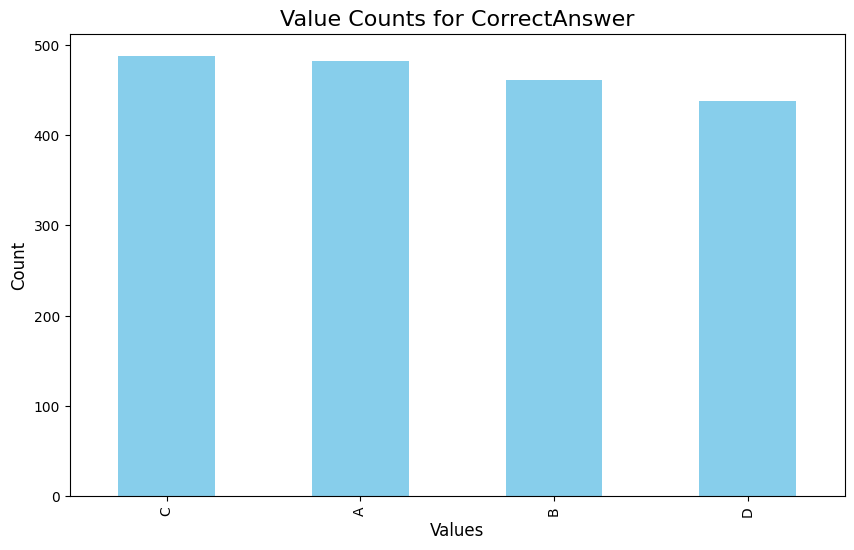

In [10]:
plot_value_counts(train, 'CorrectAnswer')

In [11]:
train['MisconceptionAId'].value_counts()

MisconceptionAId
1214.0    18
1880.0    12
1379.0    11
1507.0    10
1990.0    10
          ..
1731.0     1
1788.0     1
1818.0     1
379.0      1
801.0      1
Name: count, Length: 740, dtype: int64

In [12]:
train['MisconceptionBId'].value_counts()

MisconceptionBId
2316.0    17
1379.0    11
1507.0    11
1072.0    10
1880.0    10
          ..
2241.0     1
2279.0     1
709.0      1
2346.0     1
691.0      1
Name: count, Length: 727, dtype: int64

In [13]:
train['MisconceptionCId'].value_counts()

MisconceptionCId
1379.0    13
2316.0    12
1214.0    12
1507.0    10
77.0       7
          ..
2361.0     1
2043.0     1
2208.0     1
1024.0     1
801.0      1
Name: count, Length: 695, dtype: int64

In [14]:
train['MisconceptionDId'].value_counts()

MisconceptionDId
1214.0    14
1379.0     8
113.0      8
1880.0     8
2392.0     7
          ..
931.0      1
1181.0     1
376.0      1
1012.0     1
95.0       1
Name: count, Length: 673, dtype: int64

In [15]:
stacked = []
for i in['MisconceptionAId', 'MisconceptionBId', 'MisconceptionCId', 'MisconceptionDId']:
    stacked.extend(train[train[i].notna()][i].tolist())
    
    from collections import Counter
    
def sort_by_frequency_with_counts(input_list):
    freq_count = Counter(input_list)
    sorted_elements_with_counts = sorted(freq_count.items(), key=lambda x: (-x[1], x[0]))
    
    return sorted_elements_with_counts


sorted_elements_with_counts = sort_by_frequency_with_counts(stacked)

# Print the sorted elements along with their frequencies
print('Most frequent MisconceptionIds accross the Options : ')
print("-"*100, '\n')
for element, count in sorted_elements_with_counts[:10]:
    print("Misconception :", misTable[int(element)])
    print("MisconceptionId : ", int(element))
    print("MisconceptionId count :", count)
    print("-"*100, "\n")

Most frequent MisconceptionIds accross the Options : 
---------------------------------------------------------------------------------------------------- 

Misconception : When solving an equation, uses the same operation rather than the inverse.
MisconceptionId :  1214
MisconceptionId count : 54
---------------------------------------------------------------------------------------------------- 

Misconception : Rounds down instead of up
MisconceptionId :  1379
MisconceptionId count : 43
---------------------------------------------------------------------------------------------------- 

Misconception : Mixes up squaring and multiplying by 2 or doubling
MisconceptionId :  2316
MisconceptionId count : 38
---------------------------------------------------------------------------------------------------- 

Misconception : Carries out operations from left to right regardless of priority order
MisconceptionId :  1507
MisconceptionId count : 36
-------------------------------------------